<a href="https://colab.research.google.com/github/quinn-dougherty/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)




In [0]:
last_week_sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


class RandomVariable: 
  def __init__(self, xs): 
    self.X = xs

  def mean(self):
    N = len(self.X)
    if N==0: return 0
    else: return sum(self.X) / N

  def variance(self): 
    if len(self.X)==0: return 0
    else: 
      N = len(self.X)
      return sum([(x-self.mean())**2 for x in self.X]) / N

  def standard_deviation(self):
    from math import sqrt
    return sqrt(self.variance())

X = RandomVariable(last_week_sales)

X.mean(), X.variance(), X.standard_deviation()

(3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
last_week_customers =  [127, 80, 105, 92, 120, 115, 93]

class Joint: 
  def __init__(self, xs, ys): 
    self.X = RandomVariable(xs)
    self.Y = RandomVariable(ys)
  
  def covariance(self): 
    #https://en.wikipedia.org/wiki/Covariance#Discrete_random_variables
    assert len(self.X.X)==len(self.Y.X)
    N = len(self.X.X)
    return sum([(x - self.X.mean()) * (y - self.Y.mean()) for x,y in zip(self.X.X,self.Y.X)]) / N
  
  def correlation_coefficient(self): 
    denominator = self.X.standard_deviation() * self.Y.standard_deviation()
    assert denominator != 0
    return self.covariance() / denominator
  
XY = Joint(last_week_sales, last_week_customers)

XY.covariance(), XY.correlation_coefficient()




(6518.020408163265, 0.9628339778148909)

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
XY.correlation_coefficient()


0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

import pandas as pd

titanic = pd.read_csv(url)

titanic.describe()



,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [0]:
titanic.cov, titanic.corr

(<bound method DataFrame.cov of       Unnamed: 0  pclass  survived  \
 0              1     1.0       1.0   
 1              2     1.0       1.0   
 2              3     1.0       0.0   
 3              4     1.0       0.0   
 4              5     1.0       0.0   
 5              6     1.0       1.0   
 6              7     1.0       1.0   
 7              8     1.0       0.0   
 8              9     1.0       1.0   
 9             10     1.0       0.0   
 10            11     1.0       0.0   
 11            12     1.0       1.0   
 12            13     1.0       1.0   
 13            14     1.0       1.0   
 14            15     1.0       1.0   
 15            16     1.0       0.0   
 16            17     1.0       0.0   
 17            18     1.0       1.0   
 18            19     1.0       1.0   
 19            20     1.0       0.0   
 20            21     1.0       1.0   
 21            22     1.0       1.0   
 22            23     1.0       1.0   
 23            24     1.0       1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-3, 3)

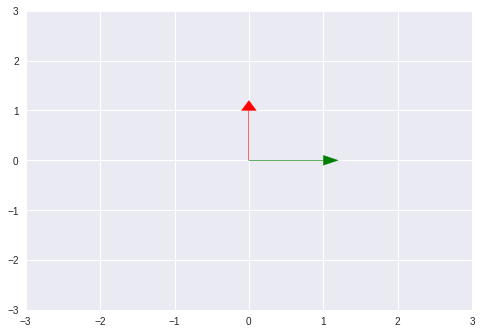

In [0]:
# perpendicular is a synonym for orthogonal 

import matplotlib.pyplot as plt

plt.arrow(0,0, 0, 1, head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, 1, 0, head_width=.2, head_length=0.2, color ='green')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
from numpy.testing import assert_almost_equal

a = [-5, 3, 7]
b = [6, -8, 2]

assert_almost_equal(0, np.dot(a, b))

AssertionError: ignored

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]

assert_almost_equal(np.linalg.norm(c) ** 2, np.dot(c,c))

c = np.asmatrix(c)
ct = c.T

np.matmul(ct, c), np.matmul(c, ct)


(matrix([[   4,  -30,   12,   40],
         [ -30,  225,  -90, -300],
         [  12,  -90,   36,  120],
         [  40, -300,  120,  400]]), matrix([[665]]))

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d =\begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d = 7 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 \begin{bmatrix} 0 \\ 1 \end{bmatrix} $ 

$e = 2 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + -8 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} $

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.asmatrix([4, 12, 11, 9, 2])

fnorm = f / np.linalg.norm(f)

fnorm

matrix([[0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167]])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-10, 10)

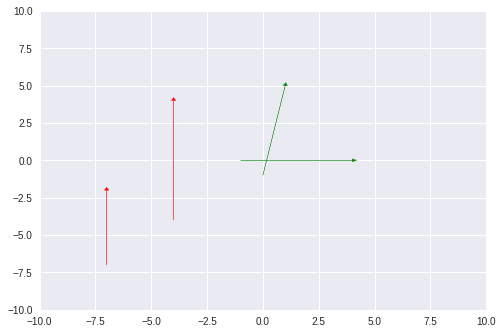

In [0]:
# perpendicular is a synonym for orthogonal 

import matplotlib.pyplot as plt

plt.arrow(-7,-7, 0, 5, head_width=.2, head_length=0.2, color ='red')
plt.arrow(-4,-4, 0, 8, head_width=.2, head_length=0.2, color ='red')

plt.arrow(-1,0, 5, 0, head_width=.2, head_length=0.2, color ='green')
plt.arrow(0,-1, 1, 6, head_width=.2, head_length=0.2, color ='green')

plt.xlim(-10, 10)
plt.ylim(-10, 10)

# linearly dependent in red, linearly independent in green

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

$h = 4g$

so $Spn(g,h) == Spn(g) == R$

In [0]:
R

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
R^3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:

import matplotlib.pyplot as plt

plt.arrow(0,0, 0, 1, head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, 1, 0, head_width=.2, head_length=0.2, color ='green')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

## 6.2 What does it mean to form a basis?

a set of vectors form a matrix when any point in Rn's standard/kronecker representation can be translated into 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

3

## 7.2 What does the rank of a matrix tell us?

for $M : \mathbb{R}^{n \times n}$ if $Rank(M) < n$ then one of $M$'s columns is redundant as a basis vector, i.e. is linearly dependent. if $Rank(M) == n$ then all columnvectors are linearly independent. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

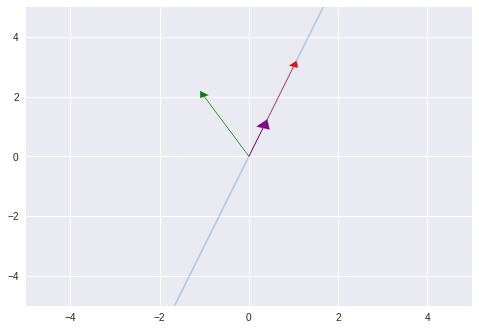

In [15]:
import numpy as np
from math import sqrt 

v = [1,3]
w = [-1, 2]

x = np.linspace(-10, 10, 100) 
y = 3 * x

import matplotlib.pyplot as plt

plt.arrow(0,0, v[0], v[1], head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, w[0], w[1], head_width=.2, head_length=0.2, color ='green')
plt.plot(x,y, alpha=0.28)

plt.xlim(-5, 5)
plt.ylim(-5, 5)

# a right triangle has a side 2 with hypotenuse sqrt(5). the unknown side is x. 
# by some pythagorean theorem, 2**2 + x**2 == (sqrt(5))**2 
# the unknown side is 1. 
# 
# so Proj_L(w) is a length 1 vector from origin on L. 

# in other words, it's a normalization of v. 

normalized_v = list(map(lambda x: x / np.linalg.norm(v), v))

plt.arrow(0,0, normalized_v[0], normalized_v[1], head_width=.3, head_length=0.3, color ='purple'); 


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

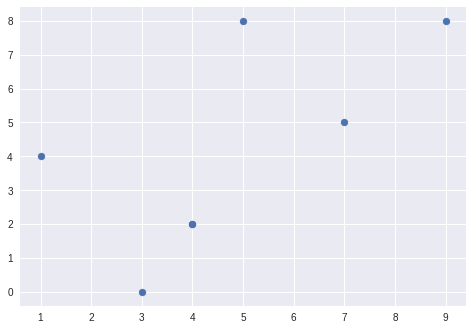

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()